<a href="https://colab.research.google.com/github/John-p-v1999/SVM_pattern/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [ ]:

!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"johnpv","key":"eac587acbe241dc48af88983d050b521"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  -----------------------------------------------  ------  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                                  428KB  2020-11-20 10:47:51           6654  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University          3MB  2020-11-20 06:04:06           2933  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                           353MB  2020-11-09 18:51:59           2965  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates           199MB  2020-10-23 16:56:10            535  
etsc9287/2020-general-election-polls                    Election, COVID, and Demographic Data by Cou

In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

 95% 257M/269M [00:19<00:00, 13.1MB/s]
100% 269M/269M [00:19<00:00, 14.3MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Validation/male/067031.jpg.jpg  
  inflating: Validation/male/067038.jpg.jpg  
  inflating: Validation/male/067040.jpg.jpg  
  inflating: Validation/male/067046.jpg.jpg  
  inflating: Validation/male/067048.jpg.jpg  
  inflating: Validation/male/067054.jpg.jpg  
  inflating: Validation/male/067064.jpg.jpg  
  inflating: Validation/male/067068.jpg.jpg  
  inflating: Validation/male/067069.jpg.jpg  
  inflating: Validation/male/067086.jpg.jpg  
  inflating: Validation/male/067091.jpg.jpg  
  inflating: Validation/male/067099.jpg.jpg  
  inflating: Validation/male/067101.jpg.jpg  
  inflating: Validation/male/067102.jpg.jpg  
  inflating: Validation/male/067112.jpg.jpg  
  inflating: Validation/male/067117.jpg.jpg  
  inflating: Validation/male/067119.jpg.jpg  
  inflating: Validation/male/067133.jpg.jpg  
  inflating: Validation/male/067143.jpg.jpg  
  inflating: Validation/male/067152.jpg.jpg  
  inflating: Validation/male/

uptil here was just loading the dataset from kaggle to google colab. For more detail go to this link
https://www.kaggle.com/general/74235

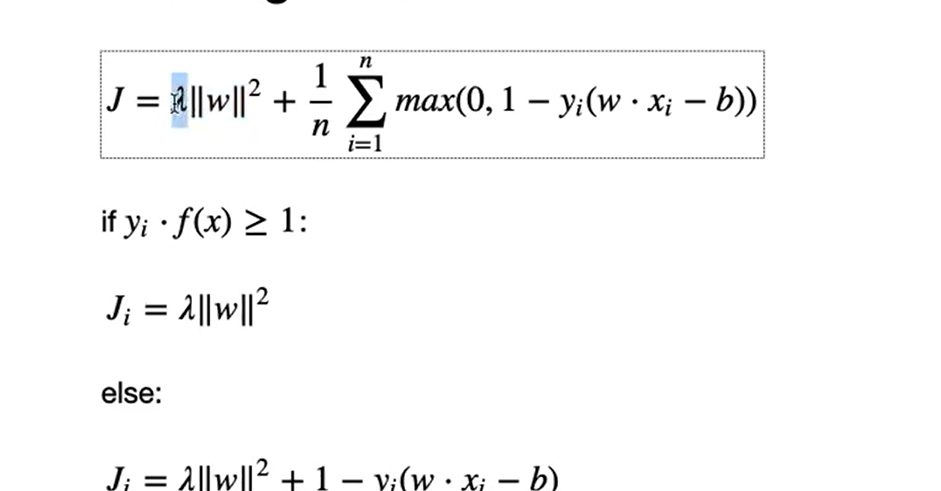the update equations are

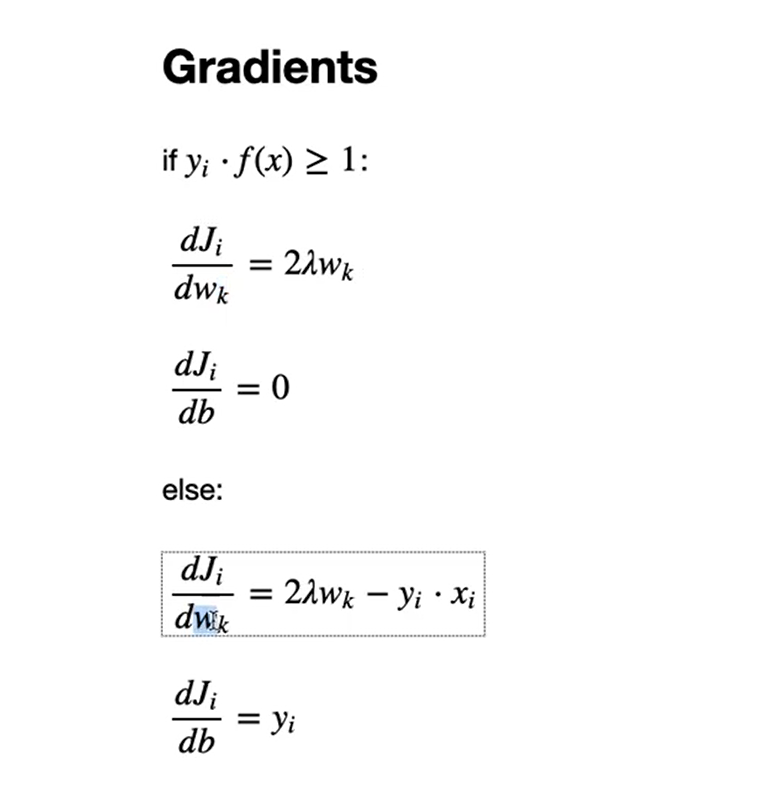

In [ ]:
class SVM:
  #initialise learning rate and lambda parameter
  def __init__(self, lr = 0.001,lambda_param = 0.01,n_iters = 100):
    self.lr = lr
    self.lambda_param = lambda_param
    self.iters = n_iters
    self.w = None
    self.b = None
    self.accuracy = []
    self.val_accuracy = []

  # the loss function equation is lambda*||W|| + yi*(w*xi - b)
  def fit(self,X,Y,X_val,Y_val):
    self.y_train = np.zeros((X.shape[0]))
    self.y_val = np.zeros((X_val.shape[0]))
    # the labels are in the form of one hot encoding, so it should be converted to either 0 or 1
    for i,ele in enumerate(Y):
      y_act = np.argmax(ele)
      if y_act == 0:
        self.y_train[i] = -1
      else:
        self.y_train[i] = 1
    for i,ele in enumerate(Y_val):
      y_act = np.argmax(ele)
      if y_act == 0:
        self.y_val[i] = -1
      else:
        self.y_val[i] = 1
    n_samples, n_features = X.shape  # getting the number of samples and features 
    self.w = np.zeros(n_features)
    self.b = 0
    for w in range(self.iters):  # we will be running self.iters number of iterations before finalising the model
      for i,x_train in enumerate(X):   # in each epoch we will go through every image in the training dataset
        values= self.y_train[i]*(np.dot(x_train,self.w)-self.b)    # the update equations are given above. please refer to that
        if values >= 1:
          self.w = self.w - (self.lr*(2*self.lambda_param*self.w))
        else:
          self.w = self.w - (self.lr*(2*self.lambda_param*self.w - np.dot(x_train,self.y_train[i])))
          self.b = self.b - (self.lr*self.y_train[i])
      acc = 0
      for i,x_train in enumerate(X):
        value = np.dot(x_train,self.w)-self.b
        if value >= 0:
          y_pred = 1
        else:
          y_pred = -1
        if y_pred == self.y_train[i]:
          acc += 1
      self.accuracy.append(acc/n_samples) # calculating the training accuracy for current epoch
      print("{0} th iteration training accuracy is {1}".format(w,self.accuracy[-1]))
      acc=0
      for i,x_val in enumerate(X_val):
        value = np.dot(x_val,self.w)-self.b
        if value >= 0:
          y_pred = 1
        else:
          y_pred = -1
        if y_pred == self.y_val[i]:
          acc += 1
      
      self.val_accuracy.append(acc/X_val.shape[0])
      print("{0}th iteration validation accuracy is {1}".format(w,self.val_accuracy[-1])) # calculating validation accruacy for current epoch

    self.validation_accuracy = self.val_accuracy[-1]
    self.training_accuracy = self.accuracy[-1]
    return self.training_accuracy,self.validation_accuracy # returning the final accuracy of the model
  def predict(self,x):              #predict function
    output = np.dot(x,self.w)-self.b
    return np.sign(output)     #if value is negative it is female, if it is positive it is male
  def plot(self):              #function to plot the accuracy versus epoch
    iterations = np.arange(1,self.iters+1)
    plt.plot(iterations,self.accuracy,label = 'training_accuracy')
    plt.plot(iterations,self.val_accuracy,label = 'validation_accuracy')
    plt.title('accuracy plot')
    plt.xlabel('iterations')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()



    



In [ ]:
train_dir = '/content/Training/'
val_dir = '/content/Validation'

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(100,100),
                                                  batch_size = 47009,
                                                  class_mode='categorical')

Found 47009 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(val_dir,
                                                  target_size=(100,100),
                                                  batch_size = 11649,
                                                  class_mode='categorical')

Found 11649 images belonging to 2 classes.


In [ ]:

x_train,y_train = train_generator.next()



In [ ]:
x_val,y_val = test_generator.next()

In [ ]:
x_tr = x_train.reshape(x_train.shape[0],30000)
x_vl = x_val.reshape(x_val.shape[0],30000)

In [ ]:
svm = SVM(lr =0.0001,lambda_param=0.001,n_iters=10)
training_acc, validation_acc = svm.fit(x_tr,y_train,x_vl,y_val)

0 th iteration training accuracy is 0.7928907230530324
0th iteration validation accuracy is 0.7876212550433513
1 th iteration training accuracy is 0.8955944606351975
1th iteration validation accuracy is 0.8963001115975621
2 th iteration training accuracy is 0.9041672871152332
2th iteration validation accuracy is 0.9050562280024036
3 th iteration training accuracy is 0.889467974217703
3th iteration validation accuracy is 0.8906343892179587
4 th iteration training accuracy is 0.9055074560190601
4th iteration validation accuracy is 0.9043694737745729
5 th iteration training accuracy is 0.8835116679784722
5th iteration validation accuracy is 0.8841960683320457
6 th iteration training accuracy is 0.9109106766789338
6th iteration validation accuracy is 0.9096059747617822
7 th iteration training accuracy is 0.9042523772043651
7th iteration validation accuracy is 0.9037685638252211
8 th iteration training accuracy is 0.9111659469463295
8th iteration validation accuracy is 0.9099493518756975
9 

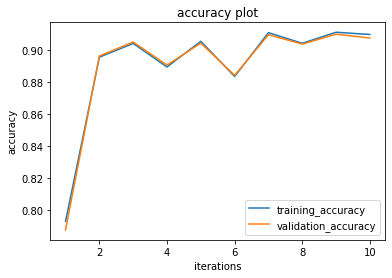

In [ ]:
svm.plot()

let us predict gender of an image from validation set

[0. 1.]


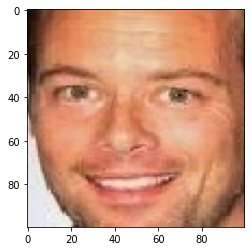

In [ ]:
plt.imshow(x_val[8])
print(y_val[8])

so [0,1] indicates male. that is np.argamx = 1 for male

In [ ]:
prediction = svm.predict(x_vl[8])
print(prediction)

1.0
